# Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [3]:
import os

In [76]:
from matplotlib.backends.backend_pdf import PdfPages

## load data

In [2]:
def load_data(file_pairs,src_dir='',dst_dir='.'):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    for file_pair in file_pairs:
        src = os.path.abspath(os.path.expanduser(os.path.join(src_dir,file_pair[0])))
        dst = os.path.expanduser(os.path.join(dst_dir,file_pair[1]))
        if os.path.isfile(dst):
            os.remove(dst)
        if not os.path.islink(dst):
            os.symlink(src,dst)

def load_data_suffixes(file_pairs, src_dir='', dst_dir='.', suffixes=None):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    if not suffixes:
        for file_pair in file_pairs:
            src = os.path.abspath(os.path.expanduser(os.path.join(src_dir, file_pair[0])))
            dst = os.path.expanduser(os.path.join(dst_dir, file_pair[1]))
            if os.path.isfile(dst):
                os.remove(dst)
            if not os.path.islink(dst):
                os.symlink(src, dst)
    else:
        for file_pair in file_pairs:
            for suffix_pair in suffixes:
                src = os.path.abspath(os.path.expanduser(
                    os.path.join(src_dir, file_pair[0] + suffix_pair[0])))
                dst = os.path.expanduser(
                    os.path.join(dst_dir, file_pair[1] + suffix_pair[1]))
                if os.path.isfile(dst):
                    os.remove(dst)
                if not os.path.islink(dst):
                    os.symlink(src, dst)

# Load data

In [4]:
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_2/analysis/TF/rerun_ChIP_total')
file_pairs = [
    ['Nanog_4.5hpf_reads.bb', 'Nanog_4.5hpf_reads.bb'],
    ['Pou5f3_5hpf_reads.bb', 'Pou5f3_5hpf_reads.bb'],
    ['Sox2_5hpf_reads.bb', 'Sox2_5hpf_reads.bb'],
    ['GSE39780_5hpf_ctrl_reads.bed', 'GSE39780_5hpf_ctrl_reads.bed'],
    ['Nanog_4.5hpf_ctrl_reads.bed', 'Nanog_4.5hpf_ctrl_reads.bed'],
]
load_data(file_pairs, src_dir='~wangwen/public_data/danRer11_2/ChIP_TF/2_signal')

In [5]:
%%bash
for fi in $(ls *.bb);do
    bedfi=${fi%%.bb}.bed
    bigBedToBed $fi $bedfi
done

In [7]:
samples = {
    'Pou5f3': {
        'ChIP': ['Pou5f3_5hpf'],
        'control': ['GSE39780_5hpf_ctrl'],
    },
    'Nanog': {
        'ChIP': ['Nanog_4.5hpf'],
        'control': ['Nanog_4.5hpf_ctrl'],
    },
    'Sox19b': {
        'ChIP': ['Sox2_5hpf'],
        'control': ['GSE39780_5hpf_ctrl'],
    },
}

# peak calling 

In [10]:
for tf in samples.keys() :
    print(f'macs2 callpeak -f BED -t {samples[tf]["ChIP"][0]}_reads.bed -n {tf}_ChIP_totalReads -g 1.4e9 --outdir . --keep-dup all 2>&1 >>/dev/null | tee {tf}_ChIP_totalReads_MACS.out')


macs2 callpeak -f BED -t Pou5f3_5hpf_reads.bed -n Pou5f3_ChIP_totalReads -g 1.4e9 --outdir . --keep-dup all 2>&1 >>/dev/null | tee Pou5f3_ChIP_totalReads_MACS.out
macs2 callpeak -f BED -t Nanog_4.5hpf_reads.bed -n Nanog_ChIP_totalReads -g 1.4e9 --outdir . --keep-dup all 2>&1 >>/dev/null | tee Nanog_ChIP_totalReads_MACS.out
macs2 callpeak -f BED -t Sox2_5hpf_reads.bed -n Sox19b_ChIP_totalReads -g 1.4e9 --outdir . --keep-dup all 2>&1 >>/dev/null | tee Sox19b_ChIP_totalReads_MACS.out


In [11]:
%%bash
macs2 callpeak -f BED -t Pou5f3_5hpf_reads.bed  -n Pou5f3_ChIP_totalReads -g 1.4e9 --outdir . --keep-dup all 2>&1 >>/dev/null | tee Pou5f3_ChIP_totalReads_MACS.out
macs2 callpeak -f BED -t Nanog_4.5hpf_reads.bed -n Nanog_ChIP_totalReads  -g 1.4e9 --outdir . --keep-dup all 2>&1 >>/dev/null | tee Nanog_ChIP_totalReads_MACS.out
macs2 callpeak -f BED -t Sox2_5hpf_reads.bed    -n Sox19b_ChIP_totalReads -g 1.4e9 --outdir . --keep-dup all 2>&1 >>/dev/null | tee Sox19b_ChIP_totalReads_MACS.out


INFO  @ Sat, 04 Dec 2021 16:07:30: 
# Command line: callpeak -f BED -t Pou5f3_5hpf_reads.bed -n Pou5f3_ChIP_totalReads -g 1.4e9 --outdir . --keep-dup all
# ARGUMENTS LIST:
# name = Pou5f3_ChIP_totalReads
# format = BED
# ChIP-seq file = ['Pou5f3_5hpf_reads.bed']
# control file = None
# effective genome size = 1.40e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Sat, 04 Dec 2021 16:07:30: #1 read tag files... 
INFO  @ Sat, 04 Dec 2021 16:07:30: #1 read treatment tags... 
INFO  @ Sat, 04 Dec 2021 16:07:31:  1000000 
INFO  @ Sat, 04 Dec 2021 16:07:32:  2000000 
INFO  @ Sat, 04 Dec 2021 16:07:33:  3000000 
INFO  @ Sat, 04 Dec 2021 16:07:34:  4000000 
INFO  @ Sat, 04 Dec 2021 16:07:35:  5000000 
INFO  @ Sat, 04 Dec 2021 16:07:36:  6000000 
INFO  @ Sat, 04 Dec 2021 16:07:38:  7000000 
INFO  @ S

In [12]:
%%bash
cd ~/fitCUTRUN/revision_2/analysis/TF/comparison_ChIPTotal
ln -s ~/fitCUTRUN/revision_1/analysis/TF/comparison/*Peak .

# filter peak

In [27]:
%%bash

cd /mnt/Storage/home/wangyiman/fitCUTRUN/revision_2/analysis/TF/rerun_ChIP_total

qvalue_cutoff=10
fold_cutoff=10


function filter {
    sample=${1}
    awk -v fold_cutoff=${fold_cutoff} -v qvalue_cutoff=${qvalue_cutoff} 'NR>21{if($8>fold_cutoff && $9>qvalue_cutoff) printf "%s\t%d\t%d\t%s\t%d\t.\t%.5f\t%.5f\t%.5f\t%d\n", $1, $2-1, $3, $10, $9*10, $8, $7, $9, $5-$2}' ${sample}_peaks.xls > ${sample}_filtered_peaks.narrowPeak
    awk -v fold_cutoff=${fold_cutoff} -v qvalue_cutoff=${qvalue_cutoff} 'NR>21{if($8>fold_cutoff && $9>qvalue_cutoff) printf "%s\t%d\t%d\t%s\t%.5f\n", $1, $5-1, $5, $10, $9}' ${sample}_peaks.xls > ${sample}_filtered_summits.bed
}

filter Nanog_ChIP_totalReads
filter Pou5f3_ChIP_totalReads
filter Sox19b_ChIP_totalReads




# peaks ov fitCR -- read number

In [175]:
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_2/analysis/TF/peakOvFitCR_ChIP_readNumDiff')

## Sampling & peak calling

### Nanog

In [151]:
%%bash
function sampling {
    total_read_fi=../rerun_ChIP_total/Nanog_4.5hpf_reads.bed
    n=`cat $total_read_fi | wc -l `
    ratio=`bc -l <<< "${1} / ${n}"`
    cat $total_read_fi | awk -v ratio=${ratio} 'BEGIN{srand(1006)} {if(rand()<ratio) print $0}' > Nanog_4.5hpf_sampDown${1}_reads.bed
}

function peak_calling {
    macs2 callpeak -f BED -t Nanog_4.5hpf_sampDown${1}_reads.bed -n Nanog_ChIP_sampDown${1} -g 1.4e9 --outdir . -q 0.01 --keep-dup all 2>&1 >>/dev/null | tee Nanog_ChIP_sampDown${1}_MACS.out
}



#     macs2 callpeak -f BED -t {samples[tf]["ChIP"][0]}_reads.bed -n {tf}_ChIP_totalReads -g 1.4e9 --outdir . --keep-dup all 2>&1 >>/dev/null | tee {tf}_ChIP_totalReads_MACS.out')



for r in 5000000 6000000 7000000 8000000 9000000;do
    sampling $r
    peak_calling $r

done


INFO  @ Tue, 07 Dec 2021 01:04:02: 
# Command line: callpeak -f BED -t Nanog_4.5hpf_sampDown5000000_reads.bed -n Nanog_ChIP_sampDown5000000 -g 1.4e9 --outdir . -q 0.01 --keep-dup all
# ARGUMENTS LIST:
# name = Nanog_ChIP_sampDown5000000
# format = BED
# ChIP-seq file = ['Nanog_4.5hpf_sampDown5000000_reads.bed']
# control file = None
# effective genome size = 1.40e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 1.00e-02
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Tue, 07 Dec 2021 01:04:02: #1 read tag files... 
INFO  @ Tue, 07 Dec 2021 01:04:02: #1 read treatment tags... 
INFO  @ Tue, 07 Dec 2021 01:04:03:  1000000 
INFO  @ Tue, 07 Dec 2021 01:04:04:  2000000 
INFO  @ Tue, 07 Dec 2021 01:04:05:  3000000 
INFO  @ Tue, 07 Dec 2021 01:04:06:  4000000 
INFO  @ Tue, 07 Dec 2021 01:04:08:  5000000 
INFO  @ Tue, 07 Dec 2021 01:04:08: #1 tag size is

### Pou5f3

In [177]:
%%bash
function sampling {
    total_read_fi=../rerun_ChIP_total/Pou5f3_5hpf_reads.bed
    n=`cat $total_read_fi | wc -l `
    ratio=`bc -l <<< "${1} / ${n}"`
    cat $total_read_fi | awk -v ratio=${ratio} 'BEGIN{srand(1006)} {if(rand()<ratio) print $0}' > Pou5f3_5hpf_sampDown${1}_reads.bed
}

function peak_calling {
    macs2 callpeak -f BED -t Pou5f3_5hpf_sampDown${1}_reads.bed -n Pou5f3_ChIP_sampDown${1} -g 1.4e9 --outdir . -q 0.01 --keep-dup all 2>&1 >>/dev/null | tee Pou5f3_ChIP_sampDown${1}_MACS.out
}



#     macs2 callpeak -f BED -t {samples[tf]["ChIP"][0]}_reads.bed -n {tf}_ChIP_totalReads -g 1.4e9 --outdir . --keep-dup all 2>&1 >>/dev/null | tee {tf}_ChIP_totalReads_MACS.out')



for r in 5 10 20 30 40;do
    sampling ${r}000000
    peak_calling ${r}000000

done


INFO  @ Wed, 08 Dec 2021 11:04:55: 
# Command line: callpeak -f BED -t Pou5f3_5hpf_sampDown5000000_reads.bed -n Pou5f3_ChIP_sampDown5000000 -g 1.4e9 --outdir . -q 0.01 --keep-dup all
# ARGUMENTS LIST:
# name = Pou5f3_ChIP_sampDown5000000
# format = BED
# ChIP-seq file = ['Pou5f3_5hpf_sampDown5000000_reads.bed']
# control file = None
# effective genome size = 1.40e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 1.00e-02
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Wed, 08 Dec 2021 11:04:55: #1 read tag files... 
INFO  @ Wed, 08 Dec 2021 11:04:55: #1 read treatment tags... 
INFO  @ Wed, 08 Dec 2021 11:04:56:  1000000 
INFO  @ Wed, 08 Dec 2021 11:04:57:  2000000 
INFO  @ Wed, 08 Dec 2021 11:04:58:  3000000 
INFO  @ Wed, 08 Dec 2021 11:04:59:  4000000 
INFO  @ Wed, 08 Dec 2021 11:05:00:  5000000 
INFO  @ Wed, 08 Dec 2021 11:05:00: #1 tag size is

### Sox2

In [178]:
%%bash
cp ../rerun_ChIP_total/Sox2_5hpf_reads.bed ../rerun_ChIP_total/Sox19b_5hpf_reads.bed

In [179]:
%%bash
function sampling {
    total_read_fi=../rerun_ChIP_total/Sox19b_5hpf_reads.bed
    n=`cat $total_read_fi | wc -l `
    ratio=`bc -l <<< "${1} / ${n}"`
    cat $total_read_fi | awk -v ratio=${ratio} 'BEGIN{srand(1006)} {if(rand()<ratio) print $0}' > Sox19b_5hpf_sampDown${1}_reads.bed
}

function peak_calling {
    macs2 callpeak -f BED -t Sox19b_5hpf_sampDown${1}_reads.bed -n Sox19b_ChIP_sampDown${1} -g 1.4e9 --outdir . -q 0.01 --keep-dup all 2>&1 >>/dev/null | tee Sox19b_ChIP_sampDown${1}_MACS.out
}



for r in 5 8 11 14 17;do
    sampling ${r}000000
    peak_calling ${r}000000

done


INFO  @ Wed, 08 Dec 2021 11:17:07: 
# Command line: callpeak -f BED -t Sox19b_5hpf_sampDown5000000_reads.bed -n Sox19b_ChIP_sampDown5000000 -g 1.4e9 --outdir . -q 0.01 --keep-dup all
# ARGUMENTS LIST:
# name = Sox19b_ChIP_sampDown5000000
# format = BED
# ChIP-seq file = ['Sox19b_5hpf_sampDown5000000_reads.bed']
# control file = None
# effective genome size = 1.40e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 1.00e-02
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Wed, 08 Dec 2021 11:17:07: #1 read tag files... 
INFO  @ Wed, 08 Dec 2021 11:17:07: #1 read treatment tags... 
INFO  @ Wed, 08 Dec 2021 11:17:09:  1000000 
INFO  @ Wed, 08 Dec 2021 11:17:10:  2000000 
INFO  @ Wed, 08 Dec 2021 11:17:11:  3000000 
INFO  @ Wed, 08 Dec 2021 11:17:12:  4000000 
INFO  @ Wed, 08 Dec 2021 11:17:13: #1 tag size is determined as 75 bps 
INFO  @ Wed, 08 Dec 20

## filtering

### Nanog

In [152]:
%%bash

qvalue_cutoff=10
fold_cutoff=10


function filter {
    sample=${1}
    awk -v fold_cutoff=${fold_cutoff} -v qvalue_cutoff=${qvalue_cutoff} 'NR>21{if($8>fold_cutoff && $9>qvalue_cutoff) printf "%s\t%d\t%d\t%s\t%d\t.\t%.5f\t%.5f\t%.5f\t%d\n", $1, $2-1, $3, $10, $9*10, $8, $7, $9, $5-$2}' ${sample}_peaks.xls > ${sample}_filtered_peaks.narrowPeak
    awk -v fold_cutoff=${fold_cutoff} -v qvalue_cutoff=${qvalue_cutoff} 'NR>21{if($8>fold_cutoff && $9>qvalue_cutoff) printf "%s\t%d\t%d\t%s\t%.5f\n", $1, $5-1, $5, $10, $9}' ${sample}_peaks.xls > ${sample}_filtered_summits.bed
}

for r in 5000000 6000000 7000000 8000000 9000000;do
    filter Nanog_ChIP_sampDown${r}
done

### Pou5f3

In [180]:
%%bash

qvalue_cutoff=10
fold_cutoff=10


function filter {
    sample=${1}
    awk -v fold_cutoff=${fold_cutoff} -v qvalue_cutoff=${qvalue_cutoff} 'NR>21{if($8>fold_cutoff && $9>qvalue_cutoff) printf "%s\t%d\t%d\t%s\t%d\t.\t%.5f\t%.5f\t%.5f\t%d\n", $1, $2-1, $3, $10, $9*10, $8, $7, $9, $5-$2}' ${sample}_peaks.xls > ${sample}_filtered_peaks.narrowPeak
    awk -v fold_cutoff=${fold_cutoff} -v qvalue_cutoff=${qvalue_cutoff} 'NR>21{if($8>fold_cutoff && $9>qvalue_cutoff) printf "%s\t%d\t%d\t%s\t%.5f\n", $1, $5-1, $5, $10, $9}' ${sample}_peaks.xls > ${sample}_filtered_summits.bed
}

for r in 5 10 20 30 40;do
    filter Pou5f3_ChIP_sampDown${r}000000
done

### Sox19b

In [181]:
%%bash

qvalue_cutoff=10
fold_cutoff=10


function filter {
    sample=${1}
    awk -v fold_cutoff=${fold_cutoff} -v qvalue_cutoff=${qvalue_cutoff} 'NR>21{if($8>fold_cutoff && $9>qvalue_cutoff) printf "%s\t%d\t%d\t%s\t%d\t.\t%.5f\t%.5f\t%.5f\t%d\n", $1, $2-1, $3, $10, $9*10, $8, $7, $9, $5-$2}' ${sample}_peaks.xls > ${sample}_filtered_peaks.narrowPeak
    awk -v fold_cutoff=${fold_cutoff} -v qvalue_cutoff=${qvalue_cutoff} 'NR>21{if($8>fold_cutoff && $9>qvalue_cutoff) printf "%s\t%d\t%d\t%s\t%.5f\n", $1, $5-1, $5, $10, $9}' ${sample}_peaks.xls > ${sample}_filtered_summits.bed
}

for r in 5 8 11 14 17;do
    filter Sox19b_ChIP_sampDown${r}000000
done

## peak intersecting

In [230]:
peak_ov_df = {}

### Nanog

In [231]:
%%bash
for r in 5000000 6000000 7000000 8000000 9000000;do
    intersectBed -u -a ../comparison_ChIPTotal/Nanog_dome_excludeIgG_filtered_peaks.narrowPeak -b Nanog_ChIP_sampDown${r}_filtered_peaks.narrowPeak | wc -l 

done

5587
6480
7183
7771
8235


In [232]:
%%bash
intersectBed -u -a ../comparison_ChIPTotal/Nanog_dome_excludeIgG_filtered_peaks.narrowPeak -b ../rerun_ChIP_total/Nanog_ChIP_totalReads_filtered_peaks.narrowPeak | wc -l 


8353


In [233]:
peak_ov_df['Nanog'] = pd.DataFrame()
peak_ov_df['Nanog']['5'] = [5587]
peak_ov_df['Nanog']['6'] = [6480]
peak_ov_df['Nanog']['7'] = [7183]
peak_ov_df['Nanog']['8'] = [7771]
peak_ov_df['Nanog']['9'] = [8235]
peak_ov_df['Nanog']['total'] = [8353]
peak_ov_df['Nanog'] = peak_ov_df['Nanog'].T
peak_ov_df['Nanog'].columns = ['overlap_peak_number']
peak_ov_df['Nanog']['read_num_M'] = peak_ov_df['Nanog'].index
peak_ov_df['Nanog'] = peak_ov_df['Nanog'].reset_index()

In [234]:
peak_ov_df['Nanog']

,index,overlap_peak_number,read_num_M
0,5,5587,5
1,6,6480,6
2,7,7183,7
3,8,7771,8
4,9,8235,9
5,total,8353,total


### Pou5f3

In [235]:
%%bash
for r in 5 10 20 30 40;do
    intersectBed -u -a ../comparison_ChIPTotal/Pou5f3_dome_excludeIgG_filtered_peaks.narrowPeak -b Pou5f3_ChIP_sampDown${r}000000_filtered_peaks.narrowPeak | wc -l 

done

66
142
224
268
297


In [236]:
%%bash
intersectBed -u -a ../comparison_ChIPTotal/Pou5f3_dome_excludeIgG_filtered_peaks.narrowPeak -b ../rerun_ChIP_total/Pou5f3_ChIP_totalReads_filtered_peaks.narrowPeak | wc -l 


303


In [237]:
peak_ov_df['Pou5f3'] = pd.DataFrame()
peak_ov_df['Pou5f3']['5'] =  [66]
peak_ov_df['Pou5f3']['10'] = [142]
peak_ov_df['Pou5f3']['20'] = [224]
peak_ov_df['Pou5f3']['30'] = [268]
peak_ov_df['Pou5f3']['40'] = [297]
peak_ov_df['Pou5f3']['total'] = [303]
peak_ov_df['Pou5f3'] = peak_ov_df['Pou5f3'].T
peak_ov_df['Pou5f3'].columns = ['overlap_peak_number']
peak_ov_df['Pou5f3']['read_num_M'] = peak_ov_df['Pou5f3'].index
peak_ov_df['Pou5f3'] = peak_ov_df['Pou5f3'].reset_index()

In [238]:
peak_ov_df['Pou5f3']

,index,overlap_peak_number,read_num_M
0,5,66,5
1,10,142,10
2,20,224,20
3,30,268,30
4,40,297,40
5,total,303,total


### Sox19b

In [239]:
%%bash
for r in 5 8 11 14 17;do
    intersectBed -u -a ../comparison_ChIPTotal/Sox19b_dome_excludeIgG_filtered_peaks.narrowPeak -b Sox19b_ChIP_sampDown${r}000000_filtered_peaks.narrowPeak | wc -l 

done

1414
1840
2124
2340
2507


In [240]:
%%bash
intersectBed -u -a ../comparison_ChIPTotal/Sox19b_dome_excludeIgG_filtered_peaks.narrowPeak -b ../rerun_ChIP_total/Sox19b_ChIP_totalReads_filtered_peaks.narrowPeak | wc -l 


2588


In [241]:
peak_ov_df['Sox19b'] = pd.DataFrame()
peak_ov_df['Sox19b']['5'] =  [1414]
peak_ov_df['Sox19b']['8'] =  [1840]
peak_ov_df['Sox19b']['11'] = [2124]
peak_ov_df['Sox19b']['14'] = [2340]
peak_ov_df['Sox19b']['17'] = [2507]
peak_ov_df['Sox19b']['total'] = [2588]
peak_ov_df['Sox19b'] = peak_ov_df['Sox19b'].T
peak_ov_df['Sox19b'].columns = ['overlap_peak_number']
peak_ov_df['Sox19b']['read_num_M'] = peak_ov_df['Sox19b'].index
peak_ov_df['Sox19b'] = peak_ov_df['Sox19b'].reset_index()

In [242]:
peak_ov_df['Sox19b']

,index,overlap_peak_number,read_num_M
0,5,1414,5
1,8,1840,8
2,11,2124,11
3,14,2340,14
4,17,2507,17
5,total,2588,total


#### bar plot -- Fig.S4KLM

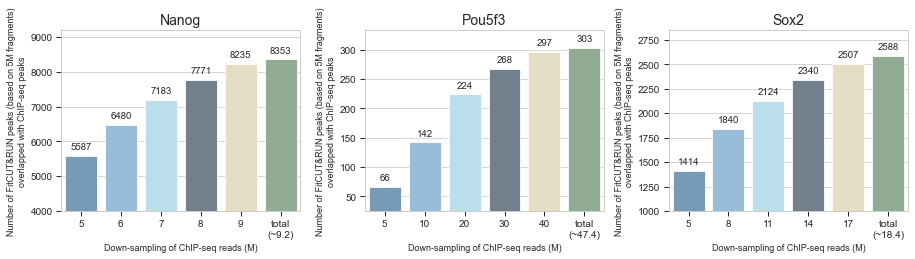

In [247]:
with sns.axes_style('whitegrid', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 9,
                             'xtick.labelsize':10,
                             'ytick.labelsize':10,
                             'legend.fontsize':10
                         }):
    fig, axes = plt.subplots(1,3,figsize=(6.4 * 2, 3.6))
    i = 0
    for tf in peak_ov_df.keys() :
        ax = axes[i]
        splot = sns.barplot(
            x='read_num_M',
            y='overlap_peak_number',
            data=peak_ov_df[tf],
            palette=['#769BB6', '#98BDD8', '#BADEEA', '#727F8D', '#E4DDC3', '#92AC93',],
            ci='sd',
            saturation=1,
            capsize=.2,
            ax=ax,
        )
        
    
        total = 9.2 if tf == 'Nanog' else 47.4 if tf == 'Pou5f3' else 18.4
        ax.set_xticklabels([x for x in peak_ov_df[tf]['index'].tolist()[:-1]] + [ f'total\n(~{total})'],
                           ) #rotation=45, ha = 'right'
        ax.set_xlabel('Down-sampling of ChIP-seq reads (M)')
        ax.set_ylabel('Number of FitCUT&RUN peaks (based on 5M fragments)\noverlapped with ChIP-seq peaks')
        ymin = 4000 if tf == 'Nanog' else 25 if tf == 'Pou5f3' else 1000
        ax.set_ylim(ymin,peak_ov_df[tf]['overlap_peak_number'].max() * 1.1)
        
        if tf == 'Sox19b' :
            title = 'Sox2'
        else :
            title = tf
        ax.set_title(title)

        for p in splot.patches:
            splot.annotate(int(p.get_height()), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
        i += 1
    
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_2/analysis/figures/FigS4KLM_peaknum_overlap_readnum_ChIP-seq.pdf', transparent=True)

In [224]:
for tf in samples.keys() :
    print(f'wc -l {samples[tf]["ChIP"][0]}_reads.bed')

wc -l Pou5f3_5hpf_reads.bed
wc -l Nanog_4.5hpf_reads.bed
wc -l Sox2_5hpf_reads.bed


In [226]:
%%bash
cd /mnt/Storage/home/wangyiman/fitCUTRUN/revision_2/analysis/TF/rerun_ChIP_total

wc -l Pou5f3_5hpf_reads.bed
wc -l Nanog_4.5hpf_reads.bed
wc -l Sox2_5hpf_reads.bed

47442456 Pou5f3_5hpf_reads.bed
9245752 Nanog_4.5hpf_reads.bed
18463601 Sox2_5hpf_reads.bed
